# Activité - Réalisez un clustering

## Déclaration des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Importation des données

In [2]:
# Définition du répertoire par défaut
custom_data_home  = "E:\\Data\\RawData\\Clustering"

# Importation des données et mise en cache
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

## Vérification de la cohérence des données source

Taille du dataset : (70000, 784)
Taille des prédictions : (70000,)
Nombre de valeurs uniques prédites : [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
1.0


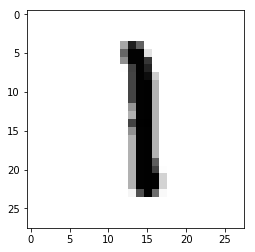

In [3]:
# Vérification de la cohérence des données
print('Taille du dataset : {}'.format(mnist.data.shape))
print('Taille des prédictions : {}'.format(mnist.target.shape))
print('Nombre de valeurs uniques prédites : {}'.format(np.unique(mnist.target)))

# Restriction du dataset à une occurence sur 50 (soit 1400 individus)
X = mnist.data[::50, :]
y = mnist.target[::50]

# Essai avec un élément particulier
sample_idx = 162
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

print(y[sample_idx])

## Essai avec un algorithme de classification hiérarchique

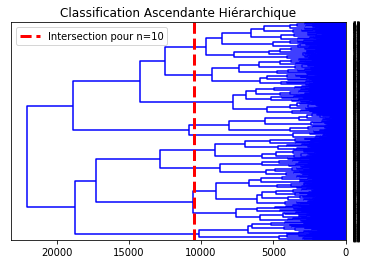

In [4]:
#générer la matrice des liens
Z = linkage(X,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title("Classification Ascendante Hiérarchique")
dendrogram(Z,labels=y,orientation='left',color_threshold=0)
plt.plot([10500, 10500], [0, 14000],
         color='red',
         linestyle='--',
         linewidth=3,
         label="Intersection pour n=10")
plt.legend(loc='upper left');
plt.show()

In [7]:
# Détermination des groupes
groupes_cah = fcluster(Z,t=10500,criterion='distance')

# Création du tableau de données
df = pd.DataFrame({'population': y, 'groupe': groupes_cah-1})
df["Delta"] = df["population"]- df["groupe"]


# Calcul du taux de pertinence de classification
df["Deltas"] = [1 if data == 0 else 0 for data in df["Delta"]]
taux_classification_correcte = df["Deltas"].mean()*100

print('Le tauw de pertinence de la classification est de : {} % '.format(round(taux_classification_correcte,2)))

Le tauw de pertinence de la classification est de : 19.64 % 


In [ ]:
# Le taux de pertinence est plutôt médiocre
# On essaie néanloins d'afficher les résultats

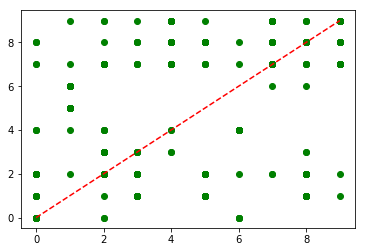

In [8]:
# Affichage des points en fonction de leur valeur d'origine et de leur groupe
plt.scatter(df.population,df.groupe,color='green')
plt.plot([0,9],[0,9],color='red',linestyle='--')
plt.show()

In [ ]:
# On constate que les résultats sont éparpillés alors qu'une bonne classification aurait rassemblé les points
# autour de la droite bissectrice ( Valeur Origine = Valeur Classifiée )

# Nénmoins on ne dispose pas des effectifs de chaque point et il peut s'agir d'outliers
# Il faut donc vérifier si les grandes classes d'effectif ne sont pas dispersées autour de la bissectrice

In [9]:
# Calcul des effectis de chaque paire (valeur origine , valeur classifiée )
df["Taille"] = df["Deltas"]
Resultats = np.zeros((10,10))

for ligne in df.iterrows():
    index_ligne = ligne[0]
    valeur_origine = int(ligne[1]["population"])
    valeur_groupe = int(ligne[1]["groupe"])
    Resultats[valeur_origine,valeur_groupe] += 1

print(Resultats)

[[113.   6.  12.   0.   3.   0.   0.   2.   3.   0.]
 [  0.   0.   1.   0.   1.  37. 117.   1.   0.   1.]
 [  2.   1.  22.  94.   4.   0.   0.  13.   1.   2.]
 [  0.  40.  90.   5.   0.   0.   0.   4.   4.   1.]
 [  0.   0.   0.   2.   2.   0.   0.  69.  20.  42.]
 [  0.  33.  23.   0.   0.   0.   0.   4.  66.   1.]
 [  4.   0.   1.   0. 130.   0.   0.   1.   1.   0.]
 [  0.   0.   2.   0.   0.   0.   1.  11.   7. 125.]
 [  0.  28.  35.   2.   0.   0.   1.   4.  64.   3.]
 [  0.   1.   1.   0.   0.   0.   0.  71.   7.  58.]]


In [ ]:
# Ce que confirmele graphique à bulle suivant :

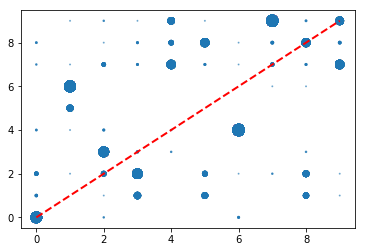

In [10]:
# Assignation à chaque point de son effectif de classe
for ligne in df.iterrows():    
    index_ligne = ligne[0]
    valeur_origine = int(ligne[1]["population"])
    valeur_groupe = int(ligne[1]["groupe"])
    df.iloc[index_ligne,4] = Resultats[valeur_origine,valeur_groupe]
    #for (x,y), value in np.ndenumerate(Resultats):
    #df["Taille"][ = Resultats[x,y]    

# Représentation du graphique à bulles
plt.scatter(df.population, df.groupe, s=df.Taille*1, alpha=0.5)
plt.plot([0,9],[0,9],color='red',linewidth=2,linestyle='--')
plt.show()

In [ ]:
## Néanmoins, on constate qu'il y a bien des points de convergence des données
## Le fait que ces point de convergence ne soient pas distribués autour de la bissectrice est sans doute dû au fait
## que notre numérotation des labels des clusters prédits est incorrecte par rapport à notre usage
## Si la claase est numérotée 3, elle ne correspond pas forcément à un groupement représentant l'image du chiffre 3

## C'est une erreur de notre part et nous sommes partis sur une mauvaise hypthèse avec la classification hiérarchique
## Celle-ci n'est pas adaptée à notre besoin de représentation des données
## Essayons donc d'autres algorithmes de clustering non supervisés

## Essai avec un algorithme de classification du K-mean

In [11]:
import random
import pylab as pl
from sklearn.cluster import KMeans

### Préparation des datasets

In [12]:
# Création de la liste des couleurs pour différencier les différents clusters
listeCouleurs = ['red',
                 'green',
                 'purple',
                 'yellow',
                 'pink',
                 'cyan',
                 'tomato',
                 'grey',
                 'goldenrod',
                 'darkkhaki']

# Initialisation de la matrice de représentation des points
coordonnees = np.zeros((y.shape[0],2))

# Sur le modèle des BoxPlot à nuage de points 
# On ajoute un bruit aléatoire à chacun des points 
# Pour pouvoir les différencier sur un plan euclidien    
for (x), value in np.ndenumerate(y):
    coordonnees[x][0] = random.random() + value
    coordonnees[x][1] = random.random() * 10 

# Intégration dans un DataFrame
coordonneesPoints = pd.DataFrame(coordonnees,columns=['Abscisse','Ordonnee'])

### Réalisation de la classification K-means

In [13]:
# Réalisation de la classificattion par K-means
KM = KMeans(n_clusters=10)

KM.fit(X)
labels = KM.labels_

# On affecte les classes prédites dans le DataFrame
coordonneesPoints["Classification"] = labels
coordonneesPoints["Couleur"] = coordonneesPoints["Classification"].map(lambda d: listeCouleurs[d])

In [14]:
# Calcul des scores
print('Le score de la classification K-mean est de {}'.format(round(KM.score(X,y),2)))
print('Le différentiel moyen par point de la classification K-mean est de {}.'.format(round(KM.score(X,y)/(y.shape[0]*128*128),2)))

Le score de la classification K-mean est de -3565864779.05
Le différentiel moyen par point de la classification K-mean est de -155.46.


### Construction de la légende (une couleur par cluster)

In [15]:
# Définition de la légende des clusters affichés
print('-------------------- Légende des clusters représentés -------------------')
for (x),value in np.ndenumerate(np.array(listeCouleurs)):
    print('Le cluster {} est représentée par la couleur {}.'.format(x[0]+1,value))


-------------------- Légende des clusters représentés -------------------
Le cluster 1 est représentée par la couleur red.
Le cluster 2 est représentée par la couleur green.
Le cluster 3 est représentée par la couleur purple.
Le cluster 4 est représentée par la couleur yellow.
Le cluster 5 est représentée par la couleur pink.
Le cluster 6 est représentée par la couleur cyan.
Le cluster 7 est représentée par la couleur tomato.
Le cluster 8 est représentée par la couleur grey.
Le cluster 9 est représentée par la couleur goldenrod.
Le cluster 10 est représentée par la couleur darkkhaki.


### Affichage des points colorés par leur cluster d'affectation

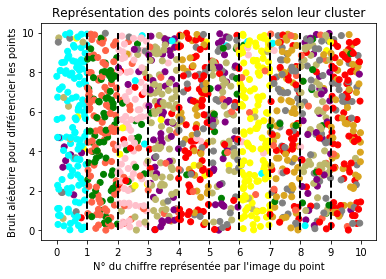

In [16]:
# Afichage sous forme de nuage de points
plt.scatter(coordonneesPoints.Abscisse,
            coordonneesPoints.Ordonnee,
            color=coordonneesPoints.Couleur)

# Séparation de chaque catégorie de chiffre
for numero in range(1,10):
    plt.plot([numero, numero], [0, 10],
             color='black',
             linestyle='--',
             linewidth=2)

# Définition des légendes
plt.title("Représentation des points colorés selon leur cluster")
axes = plt.gca()
axes = axes.set(xlabel='N° du chiffre représentée par l\'image du point', 
                ylabel='Bruit aléatoire pour différencier les points')
pl.xticks(range(0,11))
plt.show()

In [17]:
## On constate que la classification a un rendement relativement mitigé...
## Les chiffres 0, 2, 4 et 6 sont relativement homogènes ce qui signifie qu'ils sont majoritairement affectés au même cluster
## Les chiffres 1, 3, 5, 7, 8 et 9 sont en revanche peu homogènes, car leurs points ne sont pas affectés aux mêmes clusters

## Pour ces chiffres, la classification est peu optimale car pour une classe d'origine, on obtient des affectations différentes
## On peut éventuellement penser que les formes des chiffres du 1 et du 7 se ressemblent et peuvent être classés ensemble
## Une parfaite classification aurait généré un graphique avec une couleur unique par tranche...


## Autre essai de classification avec le clustering par K-Mean ++

In [ ]:
## Afin d'améliorer un peu la performance de notre classification, nous allons utiliser un algorithme K-Mean++
## Qui va permettre de ne pas amorcer la clusterisation au hasard et ce en fixant les centroïdes initiaux

-------------------- Légende des clusters représentés -------------------
Le cluster 1 est représentée par la couleur red.
Le cluster 2 est représentée par la couleur green.
Le cluster 3 est représentée par la couleur purple.
Le cluster 4 est représentée par la couleur yellow.
Le cluster 5 est représentée par la couleur pink.
Le cluster 6 est représentée par la couleur cyan.
Le cluster 7 est représentée par la couleur tomato.
Le cluster 8 est représentée par la couleur grey.
Le cluster 9 est représentée par la couleur goldenrod.
Le cluster 10 est représentée par la couleur darkkhaki.


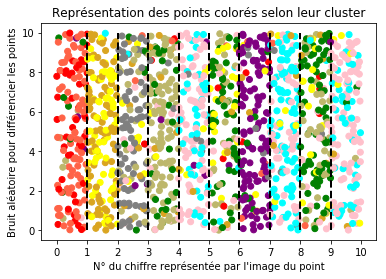

In [18]:
# Réalisation de la classificattion par K-means
KMP = KMeans(n_clusters=10,init='k-means++')

KMP.fit(X)
labels = KMP.labels_

# On affecte les classes prédites dans le DataFrame
coordonneesPoints["Classification"] = labels
coordonneesPoints["Couleur"] = coordonneesPoints["Classification"].map(lambda d: listeCouleurs[d])

# Définition de la légende des clusters affichés
print('-------------------- Légende des clusters représentés -------------------')
for (x),value in np.ndenumerate(np.array(listeCouleurs)):
    print('Le cluster {} est représentée par la couleur {}.'.format(x[0]+1,value))

# Afichage sous forme de nuage de points
plt.scatter(coordonneesPoints.Abscisse,
            coordonneesPoints.Ordonnee,
            color=coordonneesPoints.Couleur)

# Séparation de chaque catégorie de chiffre
for numero in range(1,10):
    plt.plot([numero, numero], [0, 10],
             color='black',
             linestyle='--',
             linewidth=2)

# Définition des légendes
plt.title("Représentation des points colorés selon leur cluster")
axes = plt.gca()
axes = axes.set(xlabel='N° du chiffre représentée par l\'image du point', 
                ylabel='Bruit aléatoire pour différencier les points')
pl.xticks(range(0,11))
plt.show()

In [ ]:
## Effectivement, la classification semble désormais plus homogène et plus pertinente
## Seuls les chiffres 5 et 8 semblent classifiés de façon disparate et peu homogène
## L'option d'initialisation K-Mean++ est donc un réel facteur de performance, qui rend l'algorithme plus déterministe...

## Visualisation du clustering en 2 dimensions avec TSNE

In [19]:
from matplotlib import offsetbox
from sklearn import (datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from sklearn.manifold import TSNE

In [20]:
# On assigne les données source aux différents datasets
targets = y
data = X
# On transforme chaque vecteur en matrice de pixels 28x28 pour pouvoir l'afficher comme image
images = []
for ligne in X:
    images.append(np.reshape(ligne, (28, 28)))

In [21]:
# fonction pour afficher une partie des images du dataset en visualisation en 2 dimensions
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue

            shown_images = np.r_[shown_images, [X[i]]]
            props=dict(boxstyle='round', edgecolor='white')
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)

    if title is not None:
        plt.title(title)

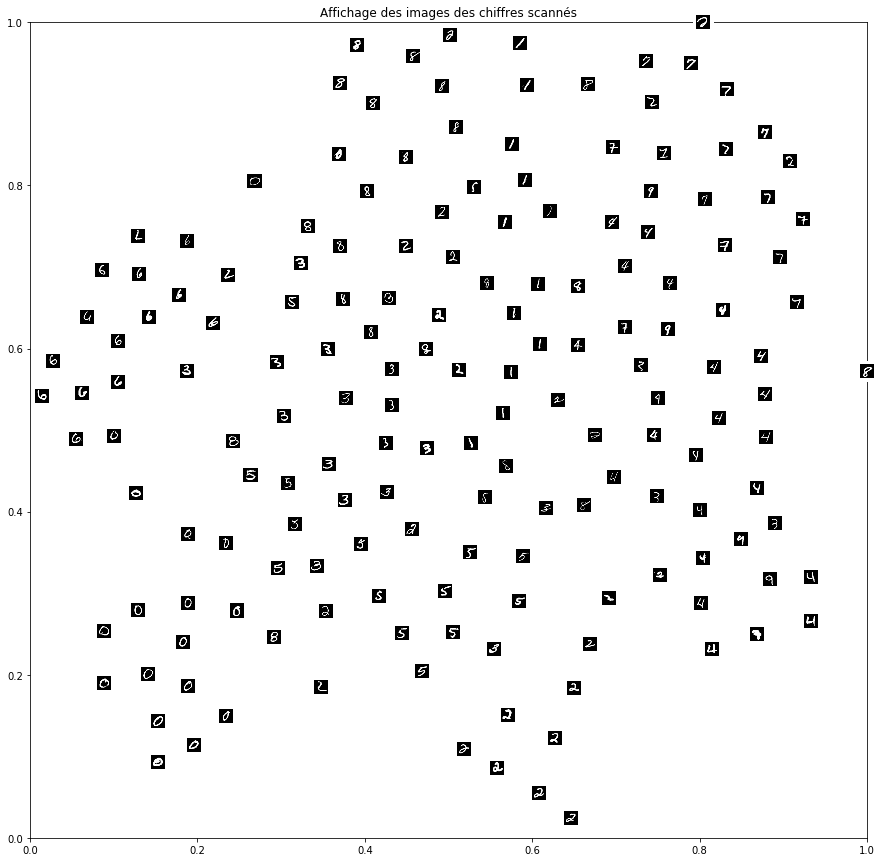

In [22]:
# On exécute une heuristique de type t-Stochastic Neighbour Embedding
X_tsne = TSNE(n_components=2).fit_transform(data)

# On affiche les résultats retournés par l'heuristique TSNE
plot_embedding(X_tsne, "Affichage des images des chiffres scannés")
plt.show()

In [ ]:
## Le résultat est intéressant mais il paraît perfectible
## On va donc essayer d'optimiser les paramètres de notre fonction TSNE

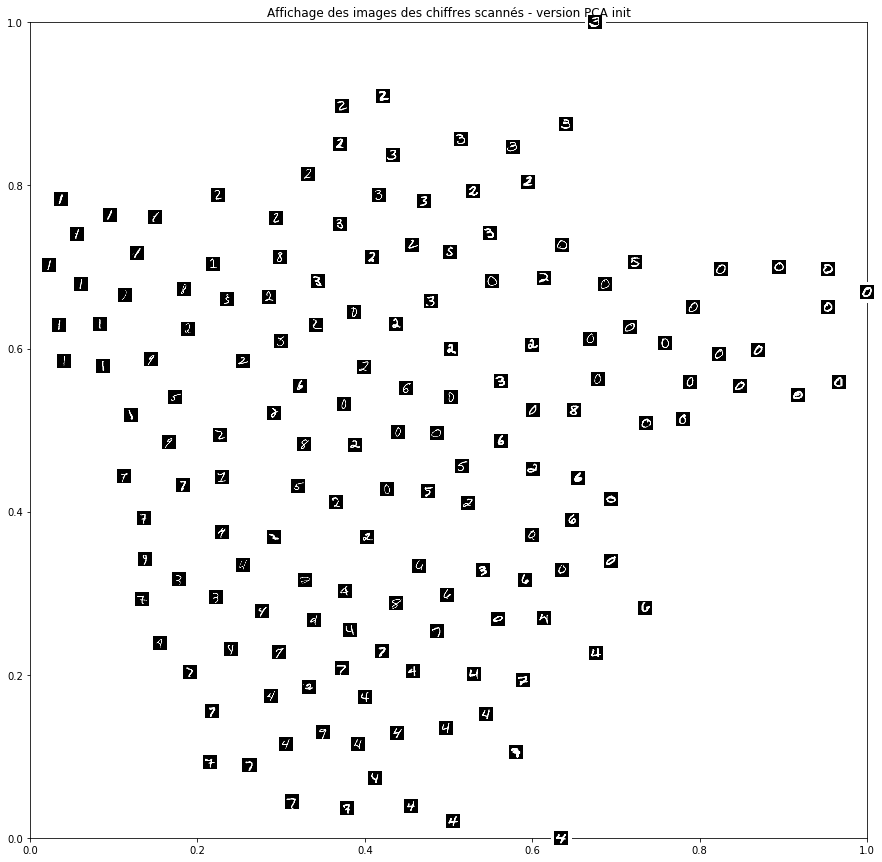

In [23]:
# Afin d'améliorer le résultat de notre heuristique TSNE
# On modifie le paramètre d'initialisation qui permet de
# Générer une analyse en composante principale en phase d'amarçage
# car l'algorithme a tendance à privilégier les optimas locaux au détriment de la structure globale
X_tsne = TSNE(n_components=2,init="pca").fit_transform(data)

# On affiche les nouveaux résultats retournés par l'heuristique TSNE - PCA
plot_embedding(X_tsne, "Affichage des images des chiffres scannés - version PCA init")
plt.show()

In [ ]:
## C'est mieux !!
## On distingue bien désormais des zones de classification homogène sur notre représentation en 2 dimensions

## Evaluation de la qualité de la classification avec K-mean++

C:\Users\monne\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


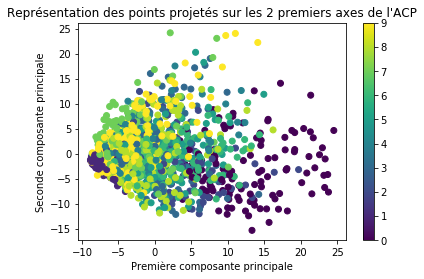

In [28]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import linear_model

# Restriction du dataset à une occurence sur 500
X = mnist.data[::50, :]
y = mnist.target[::50]

# Réalisation de la classificattion par K-means
KM = KMeans(n_clusters=10)
KM.fit(X)

# On réalise une analyse en composantes principales
# pour pouvoir représenter nos points dans un espace en 2 dimensions

# Standardisation  des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des deux premières composantes principales
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

# On projette les points sur les 2 axes des composantes principales
Dimensions = pca.transform(X_scaled)

# Intégration dans un DataFrame
coordonneesPoints = pd.DataFrame(Dimensions,columns=['Abscisse','Ordonnee'])
# On rajoute legrouped'origine (chiffre représenté) de chaque point
coordonneesPoints['Groupe'] = y

# Représentation des points projetés sur les 2 dimensions des composantes principales
# Définition des légendes
plt.title("Représentation des points projetés sur les 2 premiers axes de l'ACP")
axes = plt.gca()
axes = axes.set(xlabel='Première composante principale', 
                ylabel='Seconde composante principale')
# On affiche la représentation
plt.scatter(coordonneesPoints.Abscisse,coordonneesPoints.Ordonnee,c=coordonneesPoints.get('Groupe'))
plt.colorbar()
plt.show()

In [ ]:
## On constante bien une nette séparation de notre plan euclidien entre chiffre s'approchant de 0 sur la droite
## et chiffres se rapprochant de 9 vers la gauche

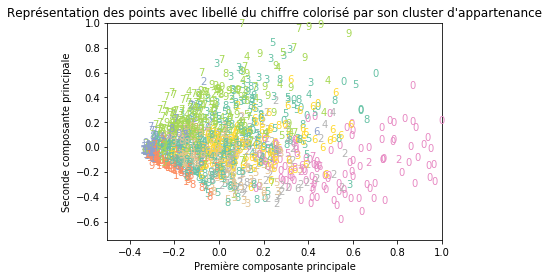

In [29]:
# On représente désormais chaque point avec ses coordonnées après ACP
# Avec comme libellé, le chiffre représenté
# Et en nuance de gris le numéro du cluster que la classification K-Man lui a affecté 

# Ajustement des limites des axes
plt.xlim([-0.5, 1])
plt.ylim([-0.751, 1])
plt.title('Représentation des points avec libellé du chiffre colorisé par son cluster d\'appartenance')
axes = plt.gca()
axes = axes.set(xlabel='Première composante principale', 
                ylabel='Seconde composante principale')

# Détermination dulibellé et de la couleur de chaque point
for ligne in range(0,Dimensions.shape[0]):
    plt.text(
            Dimensions[ligne][0]/25, 
            Dimensions[ligne][1]/25, 
            str('%d' % y[ligne]),  
            color=plt.cm.Set2(KM.labels_[ligne]/10.),
            fontsize=10
            )
plt.show()

In [ ]:
## Comme pour l'analyse en composante pricipale, on constate une démarcation entre groupe de chiffres selon leur grandeur
## On constate par ailleurs que les colorations par cluster semblent assez homogènes (exemple du 0)
## Ce qui signifierait que la classification des clusters est plutôt pertinente...

## Estimation de la qualité de la classification au sein de chaque groupe

In [ ]:
## On va s'intéresser à la variance intra-groupe pour vérifier la pertinence des classifications
## Si cette variance est faible et s'approche de 0, alors c'est qu'au sein d'un même groupe de chiffres
## un même numéro de cluster est attribué à chacun des points
## ce qui est sysnonyme d'une classification de bonne qualité...

In [31]:
# Réalisation de la classificattion par K-means
KM = KMeans(n_clusters=10,init='k-means++')

KM.fit(X)
labels = KM.labels_

# Initialisation de la matrice de représentation des points
coordonnees = np.zeros((y.shape[0],1))

# Sur le modèle des BoxPlot à nuage de points 
# On ajoute un bruit aléatoire à chacun des points 
# Pour pouvoir les différencier sur un plan euclidien    
for (x), value in np.ndenumerate(y):
    #coordonnees[x][0] =  x[0]
    coordonnees[x][0] = value 

# Intégration dans un DataFrame
coordonneesPoints = pd.DataFrame(coordonnees,columns=['Groupe'])
#coordonneesPoints.drop(['Numero'],axis=1)

# On affecte les classes prédites dans le DataFrame
coordonneesPoints["Classification"] = labels

# On va utiliser legroupe d'origine comme nouvel index de nos données
ClassementGroupe = coordonneesPoints.set_index('Groupe')

# On va désormais calculer la variabilité des affectations cluster au sein de chaque groupe
# Cette dispersion doit être faible si la classification est homogène et donc pertinente
print('Variance des affectations de clusters par groupe : ')
print(ClassementGroupe.var(axis=0,level='Groupe'))

print('Ecart-type des affectations de clusters par groupe : ')
print(ClassementGroupe.std(axis=0,level='Groupe'))


Variance des affectations de clusters par groupe : 
        Classification
Groupe                
0.0           3.968825
1.0           0.607272
2.0           4.926077
3.0           3.134421
4.0           4.422664
5.0           6.578178
6.0           2.077179
7.0           5.972981
8.0           5.173465
9.0           5.653073
Ecart-type des affectations de clusters par groupe : 
        Classification
Groupe                
0.0           1.992191
1.0           0.779277
2.0           2.219477
3.0           1.770430
4.0           2.103013
5.0           2.564796
6.0           1.441242
7.0           2.443968
8.0           2.274525
9.0           2.377619


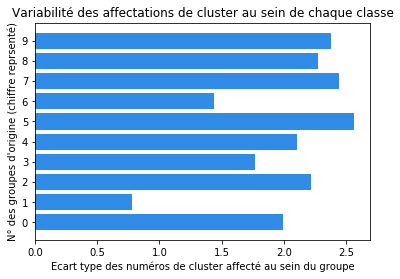

In [32]:
abscisse = []
ordonnee = []

for data in ClassementGroupe.std(axis=0,level='Groupe').iterrows():
    abscisse.append(data[0])
    ordonnee.append(data[1][0])

#Affichage des éartts types par groupe d'origine
plt.barh(abscisse,
              ordonnee,
              color="#318CE7")

# Définition des légendes
plt.title("Variabilité des affectations de cluster au sein de chaque classe")
axes = plt.gca()
axes = axes.set(xlabel='Ecart type des numéros de cluster affecté au sein du groupe', 
                ylabel='N° des groupes d\'origine (chiffre reprsenté)')

pl.yticks(range(0,10))

#Affichage du graphique
plt.show()

In [ ]:
## On constate ainsi que les chiffres 0, 1, 3, 6 obtiennent les meilleurs classifications,
## car elles sont plus homogènes en raison de leur moindre variabilité...
## Néanmoins, aucun groupe n'a une intra-variance proche de 0, ce qui montre que la classification est perfectible...

## Estimation des scores de la classification

In [34]:
# Calcul des scores
print('Le score de la classification K-mean est de {}'.format(round(KM.score(X,y),2)))
print('Le différentiel moyen par point de la classification K-mean est de {}.'.format(round(KM.score(X,y)/(y.shape[0]*128*128*(256/2)),2)))


Le score de la classification K-mean est de -3557746099.61
Le différentiel moyen par point de la classification K-mean est de -1.21.


In [ ]:
## Le score cumulé est plutôt important mais il s'agit du cumul des distances separant chaque point du contrpïde 
## qui lui a été affecté au sein de son cluster de classification
## Si on rapporte cette somme à la valeur médiane potentielle (256/2) multiplé par le nombre de pixels (28 * 28)
## On obtient une distance différentielle moyenne de 1.21...
## C'est un résultat intéressant mais qui peut sans doute être challengé!!!

## Optionnel : Réalisation d'une classification par clustering pardensité

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Lancement de la classification DBSCAN
db = DBSCAN(eps=100000, min_samples=5).fit(X)
labels = db.labels_

# Nombre de clusters (si celui-ci est égalà -1, il est considéré comme du bruit)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Nombre de clusters : %d' % n_clusters_)


C:\Users\monne\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Nombre de clusters : 1


In [38]:
## Quelque soit la configuration du paramètre Epsilon ou du paramètre des N-voisins
## On obtient pas un résultat dépassant le cluster unique englobant toutes les données...
## La structure des données source (matrice de pixels 28*28) n'est sans doute pas adaptée à une classification par densité !!!

